# 第7章&ensp;快速排序

## 7.1&ensp;描述

### 7.1&ensp;练习

#### 7.1-1&ensp;参照图

A = [9,5,8,7,4,2,6,11,21,13,19,12]<br>
q = 8

#### 7.1-2&ensp;

返回q = r<br>
```
partition(A,p,r)
    x = A[r]
    i = p-1
    k = p-1
    for j = p to r-1
        if A[j] <= x
            i = i+1
            exchange A[i] and A[j]
        if A[j] = x
            k = k +1
    exchange A[i+1] with A[r]
    if k = r-1
        return (r+p) // 2
    else
        return i+1
```

#### 7.1-3&ensp;证明

代码行|运行时间t
---|---
1|1
2|1
3|n-1
4|1
5、6|3\*(0~1)
7|1
8|1

求和得：n+3 <= t <= 4n，所以其时间复杂度是：$\Theta (n)$

#### 7.1-4&ensp;非增排序

In [1]:
def quick_sort(A,p,r):
    if p < r:
        q = quatition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)
    return A

def quatition(A,p,r):
    x = A[r]
    i = p-1
    for j in range(p,r):
        if A[j] >= x:
            i += 1
            A[j],A[i] = A[i],A[j]
    A[i+1], A[r] = A[r],A[i+1]
    return i+1

A = [2,8,7,1,3,5,6,4]
p = 0
r = len(A)-1
print(quick_sort(A,p,r))

[8, 7, 6, 5, 4, 3, 2, 1]


## 7.2&ensp;快速排序得性能

### 7.2&ensp;练习

#### 7.2-1&ensp;带入法证明

设m=n-1时有$T(m)\le cm^2$，则<br>
$T(n)=T(m)+\Theta(m+1) \le cm^2 + c(m+1) =c(m+1)^2-cm < cn^2，对c > 0时成立$

#### 7.2-2&ensp;数组A中所有元素都相同时的时间复杂度为？

$\Theta(n^2)$

#### 7.2-3&ensp;按降序排列时的时间复杂度

当按降序排列时，parition(A)返回p，需要再递归quick_sort(A,p+1,r)，即：<br>
$T(n) = T(n-1)+\Theta(n)$，故其时间复杂度为$\Theta(n^2)$

#### 7.2-4&ensp;对几乎有序的序列使用insert_sort和quick_sort进行比较

write在t0时刻开出一张支票，记为m0，后在时间tc内recieve任一时间内去银行兑换，在时刻tc时write又开第c(常数)张支票，所以对m0来说，它的兑换次序为：在支票m1前，在m2前，……，在m(c-1)前，在mc前，此时需要排序的至多为常数c项：<br>
insert_sort，在while循环中至多需要循环c次，所以其时间复杂度为$\Theta(n)$<br>
quick_sort，partition函数中for循环仍然需要n-1次，时间复杂度仍然为$O(nlgn)$

#### 7.2-5&ensp;证明

快速排序每一层所做的划分比例都是$1-a:a$，其中$0<a \le 1/2$且是一个常数，最小深度情况为：从根节点到叶节点每次划分时都是a，直到最后只剩下1个元素，深度为$log_(\frac{1}{a})n = \frac{lgn}{lg\frac{1}{a}}=-\frac{lgn}{lga}$<br>
同理最大深度的情况为：每次划分时都为1-a，深度为：$log_(\frac{1}{1-a})n=-\frac{lgn}{lg(1-a)}$

## 7.3&ensp;快速排序的随机化版本

### 7.3-1&ensp;为什么分析随机化算法的期望运行时间，而不是最坏？

最坏情况：每次划分产生的两个自问题分别包含了n-1个元素和0个元素，出现这种情况的概率是$\frac{2^n}{(n)!}$，当n无穷大时，其接近于0，所以我们不分析最坏情况

### 7.3-2&ensp;最好、最坏情况下随机数生成器被调用的次数

最坏：$\Theta (n)$，最好：$\Theta (lgn)$<br>
最坏情况：同上，被调用的次数为：n<br>
最好情况：每次都划分成n/2，被调用的次数为：lgn

## 7.4&ensp;快速排序分析

### 7.4-1&ensp;证明：在递归式$T(n) = \max\limits_{0\le q \le n-1}(T(q)+T(n-1-q))+\Theta(n)$中，$T(n)=\Omega(n^2)$

设m < n，存在常数c，使得当$n>n_0$时，$T(m)\ge cm^2$成立，<br>
$T(n) \ge \max(cq^2+c(n-1-q)^2)+\Theta(n)$=$c(\max(q^2+(n-1-q)^2))+\Theta(n)$<br>
表达式$q^2+(n-q-1)^2$在参数取值区间$0\le q \le n-1$的端点上取得最大值，我们得到表达式的上界$(n-1)^2$，将其带入上式中，得到：<br>
$T(n)\ge cn^2-c(2n-1)+\Theta(n)$，当我们合理选择c的值时，能够保证$\Theta(n)-c(2n-1)$为正数，此时即可满足$T(n)\ge cn^2$

### 7.4-2&ensp;证明最好情况下快速排序运行时间

在P98中已经证明了最好情况下的解为$\Omega(nlgn)$，根据$\Omega$的定义，已经证明了<br>
设$m=\frac{n}{2}$时$T(m)\ge cmlgm$成立，则$T(n)=2c*\frac{n}{2}*lg\frac{n}{2}+\Theta(n)\ge cnlgn +(\Theta(n)-cn)$ $\ge cnlgn$，需要保证c的取值较小时，$\Theta(n)-cn$为正数即可

### 7.4-3&ensp;证明$q^2+(n-q-1)^2$在端点处取得最大值

这是一个几何问题，如下图，即证明

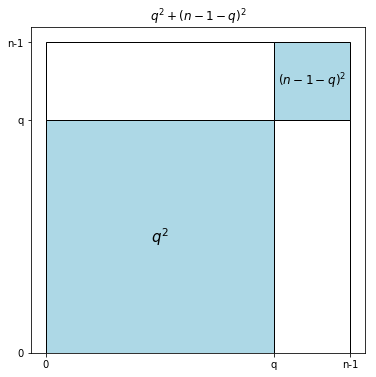

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

l = [0,0,1.5,1.5]
h = [1.5,0.5,1.5,0.5]
w = [1.5,1.5,0.5,0.5]
b = [0,1.5,0,1.5]
plt.figure(figsize=(6,6))

plt.bar(l, h, w, b,
               color=['lightblue','white','white','lightblue'],
               edgecolor=['#000000','#000000','#000000','#000000'],
               linewidth= [1,1,1,1],
               # xerr=4,
               # yerr=1,
               # ecolor='#999999',
               # capsize=10,
               align='edge',
               # orientation='horizontal',
               # tick_label=['0','q','n-1']
              )
plt.yticks([0,1.5,2],['0','q','n-1'])
plt.xticks([0,1.5,2],['0','q','n-1'])
plt.title(r'$q^2+(n-1-q)^2$')
plt.text(s = r'$q^2$',
        x = 0.75,
        y = 0.75, 
        fontdict=None, 
        withdash=False,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize = 15)
plt.text(s = r'$(n-1-q)^2$',
        x = 1.75,
        y = 1.75, 
        fontdict=None, 
        withdash=False,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize = 12)
plt.show()

## 思考题

### 7-1&ensp;Hoare划分的正确性

a.&ensp;return j = 9
b.&ensp;j的初始值是r+1，第6行代码运行结束，即保证j <= r，第7行代码保证r >= p;<br>
&ensp;同理，i的初始值是p-1，第9行、10行代码运行结束，i = p，A[i] == x，此时如果i < j，那么将[i]和A[j]交换，之后循环的时候总能使A[i]再次等于x<br>
c.&ensp;因为A[p]是主元，而A[j]一定会降到等于主元主元时repeat until这个循环才会结束<br>
d.&ensp;hoare_partition的while循环将A从左到右分为3个部分：<= x，无限制，>=x，i每向右移一位，< x的部分增加一个元素，无限制的减少一个元素，当出现>= x的元素时，reapt until循环结束；
j每向左移动一位，>x的增加一个元素，无限制的减少一个元素，当出现<= x的元素时，reapt until循环结束；此时再比较i和j，如果i在j的左边，那么，就将A[j]\(<= x的元素)和A[i]\(>=x的元素)交换，保证结果在j和j右边的元素是大于等于x的。while循环上述，直到i>=j，结束while循环。
e.&ensp;已经重写

### 7-2&ensp;相同元素的快速排序

a. $\Theta(n^2)$，因为randomized_quick_sort每递归一次仅减少一个元素，$T(n) = T(n-1) + \Theta(n)$

b. 已完成

c. 已完成

d. 

### 7-3&ensp;快速排序的分析

a. $\frac{1}{n}$

e. 设对于q<= n时有$E[T(q)]<= cqlgq$，带入：
$\frac{2}{n}\sum\limits_{q=2}^{n-1}E[T(q)] \le$  $\frac{2}{n}\sum\limits_{q=2}^{n-1}cqlgq$，再利用公式7.7，$\le \frac{2c}{n}*(\frac{1}{2}n^2lgn - \frac{1}{8}n^2)=$ $cnlgn-\frac{cn}{4}$<br>
$E[T(n)]\le cnlgn-\frac{cn}{4}+\Theta(n)$ $\le cnlgn$，选择较小c，使$\Theta(n)-\frac{cn}{4}$为非负数即可